# Example of submission for the noise estimation

In [1]:
import yaml
import numpy
import csv
import pandas

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

plt.style.use(['seaborn-ticks','seaborn-deep'])
# %pylab inline

mpl.rcParams.update({'font.size': 16})
plt.rcParams['axes.grid'] = True
plt.rcParams["figure.figsize"] = (12,7)


### Create fake instumental and Galactic noise estimation 

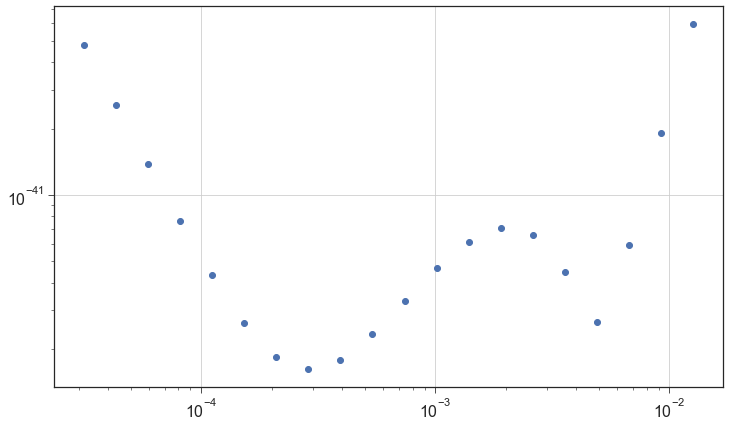

In [13]:
ref_pars = [(2.0e-15)**2, (10.e-12)**2, 1.2e-44, 2.0e-3, 4.8e-4, 1.6, 5.0e-3]

Larm = 8.3391023799538
light =  299792458.0

def SimpleNoise(pars, frqs, Atdi=True):
    Sacc, Soms, A, f1, f2, alpha, fknee = pars
    fl1 = 0.4e-3
    fl2 = 8.0e-3
    fu1 = 2.0e-3
    om = 2.0*np.pi*frqs
    Spm = Sacc * (1.0 +(fl1/frqs)**2) * (1.0+(frqs/fl2)**4) / (light*om)**2
    Sop = Soms * (1. + (fu1/frqs)**4) *(om/light)**2

    
    x = om*Larm
    if Atdi:
        Sinstr = 8.0 * np.sin(x)**2 * ( 2.0*Spm*(3.0 + 2.0*np.cos(x) + np.cos(2*x)) + Sop * (2.0 + np.cos(x)))
    else: ### Xtdi
        Sinstr = 16.0 * np.sin(x)**2 * (2.0 * (1.0 + np.cos(x)**2) * Spm + Sop)
    
    Shgal = A * frqs**(-7./3.) *np.exp( -(frqs/f1)**alpha )*0.5*( 1. + np.tanh(-(frqs - fknee)/f2)  )
    Sgal = 4.*(x*np.sin(x))**2*Shgal
    if Atdi:
        Sgal = 1.5*Sgal
        
    return (Sinstr + Sgal)

frqs = np.logspace(-4.5, -1.9, 20)

plt.loglog(frqs, SimpleNoise(ref_pars, frqs), 'o')
plt.show()
meanS = SimpleNoise(ref_pars, frqs)

In [24]:
sigs = np.random.random(len(frqs))*0.1*meanS
print (meanS)
print (sigs)

[4.79004581e-41 2.56884661e-41 1.38752685e-41 7.60935273e-42
 4.31401655e-42 2.62818533e-42 1.84478753e-42 1.61470907e-42
 1.79157930e-42 2.34655944e-42 3.30359087e-42 4.64488162e-42
 6.13620332e-42 7.10936771e-42 6.58560653e-42 4.45802177e-42
 2.63682672e-42 5.93972756e-42 1.90609306e-41 5.98711321e-41]
[4.05049756e-42 2.32109427e-42 2.08218933e-45 2.31547465e-43
 7.72448834e-44 5.97753728e-44 2.88131194e-44 5.23992604e-44
 1.55062875e-43 1.72683196e-43 2.69539813e-43 2.27390277e-43
 5.82316482e-43 6.94463068e-43 4.58818120e-43 3.99162274e-43
 2.19397233e-43 5.93903975e-43 1.08304880e-42 5.13256841e-42]


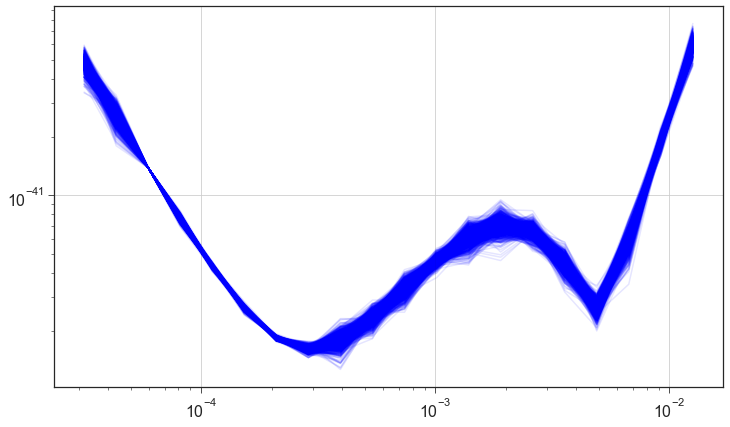

(1000, 20)


In [40]:
N=1000
draws = []
for ii in range(N):
    ys = np.random.normal(meanS, sigs)
    draws.append(ys)
    plt.loglog(frqs, ys, alpha=0.1, c='b')
plt.show()
draws=np.array(draws)
print (draws.shape)

### Compute the 90% confidence interval

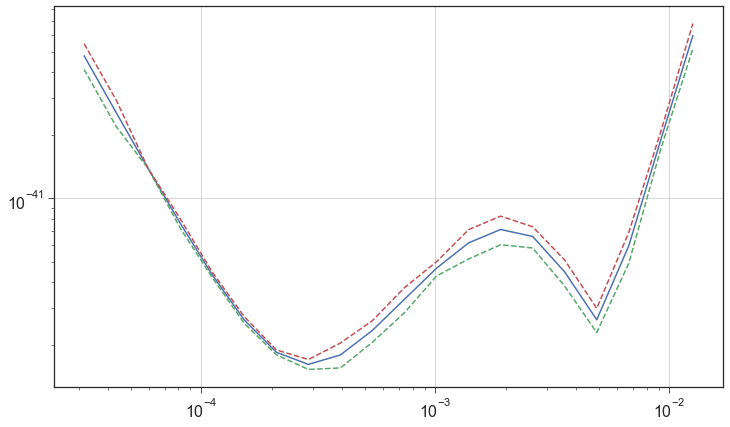

In [41]:
CI_up = np.zeros(len(frqs))
CI_lo = np.zeros(len(frqs))

for ii in range(len(frqs)):
    pnt = draws[:, ii]
    CI_lo[ii] = np.quantile(pnt, 0.05)
    CI_up[ii] = np.quantile(pnt, 0.95)
    
plt.loglog(frqs, meanS)
plt.loglog(frqs, CI_lo, '--')
plt.loglog(frqs, CI_up, '--')
plt.show()

    
submit_noise = np.zeros((len(frqs), 3))
nms = ['meanPSD', 'lowCI', 'upCI']
submit_noise[:,0] = meanS
submit_noise[:,1] = CI_lo
submit_noise[:,2] = CI_up


In [42]:
np.savetxt('sangria-noise.csv', submit_noise,
              header=','.join(nms),
              delimiter=',', fmt='%.8e')

In [43]:
!cat sangria-noise.csv

# meanPSD,lowCI,upCI
4.79004581e-41,4.12271489e-41,5.46740269e-41
2.56884661e-41,2.20464998e-41,2.94881233e-41
1.38752685e-41,1.38714850e-41,1.38786444e-41
7.60935273e-42,7.21166438e-42,7.99357549e-42
4.31401655e-42,4.19240840e-42,4.44715482e-42
2.62818533e-42,2.53192486e-42,2.72675152e-42
1.84478753e-42,1.79504590e-42,1.89199847e-42
1.61470907e-42,1.52733898e-42,1.70347707e-42
1.79157930e-42,1.55313368e-42,2.04120908e-42
2.34655944e-42,2.06108908e-42,2.61262712e-42
3.30359087e-42,2.85030886e-42,3.75361474e-42
4.64488162e-42,4.26132962e-42,4.98780139e-42
6.13620332e-42,5.13972308e-42,7.09283681e-42
7.10936771e-42,6.01121420e-42,8.23192832e-42
6.58560653e-42,5.80006806e-42,7.32536850e-42
4.45802177e-42,3.81545134e-42,5.07899667e-42
2.63682672e-42,2.29067478e-42,2.98891702e-42
5.93972756e-42,4.90491749e-42,6.88159300e-42
1.90609306e-41,1.72401385e-41,2.08498639e-41
5.98711321e-41,5.17677863e-41,6.83046692e-41
